# Introduction to Neural Networks

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/627d1225cb1b3d197840427a_60f040a887535b932a3b2b6e_cnn-hero%2520(1).png" alt="drawing" width="600"/>


## Perceptron / Перцептрон
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Colored_neural_network_uk.svg/1280px-Colored_neural_network_uk.svg.png" alt="drawing" width="400"/>

In [3]:
# Perceptron

import numpy as np

class Perceptron:
    def __init__(self, input_size: int, learning_rate: float = 0.1):
        """
        Perceptron initialization.

        Start with initial weights (weight_i) and a bias (bias). These can be set to zero or small random values.

        Inputs:
            input_size (int): number of input features
            learning_rate (float): a hyperparameter that controls the step size during weight updates. 
                It prevents the weights from being updated too much at once, helping the model converge to a solution.
        """
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate

    def predict(self, inputs: np.array) -> int:
        dot_product = np.dot(inputs, self.weights) + self.bias
        activation_function_result = 1 if dot_product > 0 else 0
        return activation_function_result

    def train(self, training_inputs: np.array, labels: np.array, epochs: int = 10):
        """
        Training process of the Perceptron. The update of weights in a perceptron 
        is based on the error between the predicted output and the actual target (label). 
        The process is driven by a learning rule known as the perceptron learning rule.
        It involves the following steps:
        1. Initialize the weights and bias (see the `__init__` method).
        2. For each training example:
          2.1. Calculate prediction
          2.2. Apply Activation Function
          2.3. Compute error
          2.4. Update weights
          2.5. Update bias
        3. Repeat until convergence
        Repeat these steps for each training example in the dataset, and for multiple epochs if necessary. 
        The process continues until the algorithm converges to a solution or until a predetermined number of epochs is reached.
        
        The goal is to adjust the weights and bias in a way that minimizes the error, 
        ultimately allowing the perceptron to make accurate predictions. 
        It's important to note that the perceptron learning rule works well for linearly separable problems,
        where a decision boundary can be drawn to separate the classes. For more complex problems, 
        multilayer perceptrons or other neural network architectures may be used.
        """
        for epoch in range(epochs):
            print(f"Training epoch {epoch+1}/{epochs}")
            for inputs, label in zip(training_inputs, labels):
                print(f"Example: inputs {inputs} and label {label}")
                print(f"Weights: {self.weights}")
                print(f"Bias: {self.bias}")
                prediction = self.predict(inputs)
                error = label - prediction
                print(f"Training error: {error}")
                # weight_i_new = weight_i_old + (learning_rate × error × input_i)
                self.weights += self.learning_rate * error * inputs
                # bias_new = bias_old + (learning_rate × error)
                self.bias += self.learning_rate * error
                print("")
            print("*****")
            print("")

# Example usage:
# Training data: OR gate
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])

# Create a perceptron with 2 input neurons
perceptron = Perceptron(input_size=2)

# Train the perceptron
perceptron.train(training_inputs, labels)

# Test the trained perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for inputs in test_inputs:
    output = perceptron.predict(inputs)
    print(f"{inputs} -> {output}")


Training epoch 1/10
Example: inputs [0 0] and label 0
Weights: [0. 0.]
Bias: 0
Training error: 0

Example: inputs [0 1] and label 1
Weights: [0. 0.]
Bias: 0.0
Training error: 1

Example: inputs [1 0] and label 1
Weights: [0.  0.1]
Bias: 0.1
Training error: 0

Example: inputs [1 1] and label 1
Weights: [0.  0.1]
Bias: 0.1
Training error: 0

*****

Training epoch 2/10
Example: inputs [0 0] and label 0
Weights: [0.  0.1]
Bias: 0.1
Training error: -1

Example: inputs [0 1] and label 1
Weights: [0.  0.1]
Bias: 0.0
Training error: 0

Example: inputs [1 0] and label 1
Weights: [0.  0.1]
Bias: 0.0
Training error: 1

Example: inputs [1 1] and label 1
Weights: [0.1 0.1]
Bias: 0.1
Training error: 0

*****

Training epoch 3/10
Example: inputs [0 0] and label 0
Weights: [0.1 0.1]
Bias: 0.1
Training error: -1

Example: inputs [0 1] and label 1
Weights: [0.1 0.1]
Bias: 0.0
Training error: 0

Example: inputs [1 0] and label 1
Weights: [0.1 0.1]
Bias: 0.0
Training error: 0

Example: inputs [1 1] and la

## Multi-layer perceptron / Багатошаровий перцептрон
<img src="https://upload.wikimedia.org/wikipedia/uk/d/de/Neuro.PNG" alt="drawing" width="600"/>

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

class MultiLayerPerceptron:
    def __init__(self, input_size: int, hidden_size: int = 10, output_size: int = 1):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # пошук похідної для будь-якої функції: https://www.derivative-calculator.net
        # https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/
        return x * (1 - x)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        # пошук похідної для будь-якої функції: https://www.derivative-calculator.net
        # https://yashgarg1232.medium.com/derivative-of-neural-activation-function-64e9e825b67
        return np.where(x > 0, 1, 0)

    def binary_cross_entropy_loss(self, y_true: np.array, y_pred: np.array):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def binary_cross_entropy_loss_derivative(self, y_true: np.array, y_pred: np.array):
        # пошук похідної для будь-якої функції: https://www.derivative-calculator.net
        epsilon = 1e-15  # to prevent division by zero issues
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return (y_pred - y_true) / (y_pred * (1 - y_pred))

    def predict(self, X: np.array):
        # Forward propagation for prediction
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.biases_hidden
        hidden_layer_output = self.relu(hidden_layer_input)  # activation function
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.biases_output
        predicted_output = self.sigmoid(output_layer_input) # activation function, probabilities
        return predicted_output

    def train(self, X_train: np.array, y_train: np.array, learning_rate: float = 0.01, epochs: int = 50):
        for epoch in range(epochs):
            # Forward propagation
            hidden_layer_input = np.dot(X_train, self.weights_input_hidden) + self.biases_hidden
            hidden_layer_output = self.relu(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.biases_output
            predicted_output = self.sigmoid(output_layer_input)

            # Calculate loss
            loss = np.mean(self.binary_cross_entropy_loss(y_train.reshape(-1, 1), predicted_output))

            # Backward propagation - Метод зворотного поширення помилки
            
            output_error = self.binary_cross_entropy_loss_derivative(y_train.reshape(-1, 1), predicted_output)  # похідна помилки
            output_delta = output_error * self.sigmoid_derivative(predicted_output) # дельта на шарі виходу 

            hidden_layer_error = np.dot(output_delta, self.weights_hidden_output.T)
            hidden_layer_delta = hidden_layer_error * self.relu_derivative(hidden_layer_output)  # похідна*помилку на прихованих шарах

            # Update weights and biases
            self.weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_delta)  # оновлення ваг
            self.biases_output -= learning_rate * np.sum(output_delta, axis=0, keepdims=True)  # оновлення зсуву

            self.weights_input_hidden -= learning_rate * np.dot(X_train.T, hidden_layer_delta)
            self.biases_hidden -= learning_rate * np.sum(hidden_layer_delta, axis=0, keepdims=True)

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP
mlp = MultiLayerPerceptron(input_size=X_train.shape[1], hidden_size=10, output_size=1)
mlp.train(X_train, y_train, learning_rate=0.01, epochs=50)

# Test the trained model
predicted_output = mlp.predict(X_test)

# Convert predicted probabilities to binary predictions
binary_predictions = (predicted_output > 0.5).astype(int)

# Evaluate accuracy
accuracy = np.mean(binary_predictions == y_test.reshape(-1, 1))
print(f'\nTest Accuracy: {accuracy:.4f}')


Epoch 0, Loss: 2.587786016174109
Epoch 10, Loss: 0.4067462280378129
Epoch 20, Loss: 0.3573070458942738
Epoch 30, Loss: 0.3290809062103632
Epoch 40, Loss: 0.3162449125421231

Test Accuracy: 0.8000


## Backpropagation
https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/

## MLP vs. ANN?

https://www.quora.com/What-is-the-clear-difference-between-ANN-and-MultiLayer-Perceptron#:~:text=The%20main%20difference%20between%20the,called%20artificial%20neurons%20or%20perceptrons.

## Activation functions

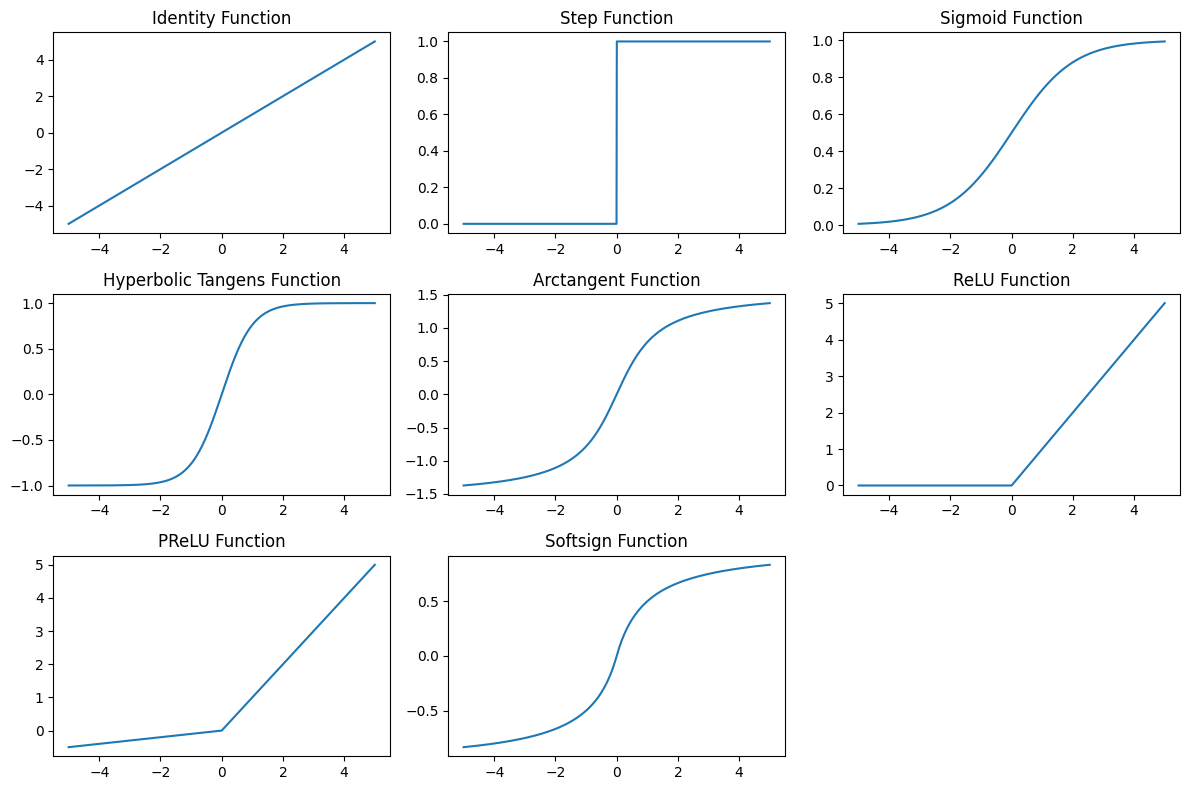

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def identity(x):
    # Тотожна функція (Identity Function):
    # Use when you want the output of the neuron to be the same as its input.
    # Commonly used in the output layer for regression problems.
    return x

def step(x):
    # Функція Хевісайда (одинична "сходинка") (Step Function):
    # Rarely used in hidden layers due to its discontinuity and non-differentiability.
    # Commonly used in the output layer for binary classification problems.
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    # Логістична функція (сигмоїда) (Sigmoid Function):
    # Use in the output layer for binary classification problems, where the output needs to be in the range (0, 1).
    # Avoid using in hidden layers of deep networks due to the vanishing gradient problem.
    return 1 / (1 + np.exp(-x))

def tanh(x):
    # Гіперболічний тангенс (Hyperbolic Tangens Function) (tanh):
    # Similar to the sigmoid but with output range (-1, 1).
    # Suitable for hidden layers in networks where inputs are centered around zero.
    # Helps mitigate the vanishing gradient problem compared to the sigmoid.
    return np.tanh(x)

def arctan(x):
    # Арктангенс (Arctangent Function) (arctan):
    # Rarely used in practice for neural networks.
    # May be suitable when you want a smooth function with outputs in a specific range.
    return np.arctan(x)

def relu(x):
    # Лінійний випрямляч (ReLU від англійської Rectified linear unit):
    # Widely used in hidden layers for most tasks.
    # Introduces non-linearity while avoiding the vanishing gradient problem.
    # Efficient training and computation.
    return np.maximum(0, x)

def prelu(x, alpha=0.1):
    # Параметричний лінійний випрямляч (PReLU) (Parametric ReLU):
    # Similar to ReLU but with a learnable parameter to control the negative slope.
    # Useful when you want the network to learn the optimal slope for negative inputs.
    return np.maximum(0, x) + alpha * np.minimum(0, x)

def softsign(x):
    # Softsign Function:
    # Similar to tanh but with an unbounded range.
    # Smooth and differentiable, making it a good alternative to tanh or sigmoid.
    return x / (1 + np.abs(x))

# Define the input range
x = np.linspace(-5, 5, 1000)

# Plotting the activation functions
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(x, identity(x))
plt.title('Identity Function')

plt.subplot(3, 3, 2)
plt.plot(x, step(x))
plt.title('Step Function')

plt.subplot(3, 3, 3)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')

plt.subplot(3, 3, 4)
plt.plot(x, tanh(x))
plt.title('Hyperbolic Tangens Function')

plt.subplot(3, 3, 5)
plt.plot(x, arctan(x))
plt.title('Arctangent Function')

plt.subplot(3, 3, 6)
plt.plot(x, relu(x))
plt.title('ReLU Function')

plt.subplot(3, 3, 7)
plt.plot(x, prelu(x))
plt.title('PReLU Function')

plt.subplot(3, 3, 8)
plt.plot(x, softsign(x))
plt.title('Softsign Function')

plt.tight_layout()
plt.show()
